In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

1. `**지역에 따라서 선호하는 게임 장르가 다를까` 라는 질문에 대답을 하셔야합니다.**
2. `**연도별 게임의 트렌드가 있을까` 라는 질문에 대답을 하셔야합니다.**
3. `**출고량이 높은 게임에 대한 분석 및 시각화 프로세스`가 포함되어야 합니다.**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rc('font', family='NanumBarunGothic')
mpl.rc('axes', unicode_minus=False)

In [6]:
games = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project 1 ( 2022-02-11)/vgames2.csv')
games = games.loc[:, 'Name':]
games_copy = games.copy()
games.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [7]:
def to_numeric(col):
    data = col.replace(r'[M]+$', '', regex=True)
    result = data.replace(r'[K]+$', '', regex=True).astype(float) / col.str.extract(r'[\d\.]+([K]+)', expand=False).fillna(1).replace(['K'], [1000]).astype(int)
    return result

In [8]:
games['NA_Sales'] = to_numeric(games['NA_Sales'])
games['EU_Sales'] = to_numeric(games['EU_Sales'])
games['JP_Sales'] = to_numeric(games['JP_Sales'])
games['Other_Sales'] = to_numeric(games['Other_Sales'])
games[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].isnull().sum()

NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [9]:
print(games['Genre'].isna().sum())
print(games['Year'].isna().sum())
print(games['Publisher'].isna().sum())

50
271
58


In [10]:
games['Year'].loc[games['Year'] < 100].head() # 년도 오 표기
print(games['Year'].loc[games['Year'] < 100].count())

100


In [11]:
def makeyear(year):
    result = []
    for i in year:
        if 80 < i and i < 100:
            result.append(i + 1900)
        elif i < 80:
            result.append(2000 + i)
        else:
            result.append(i)
    return result
games['Year'] = makeyear(games['Year'])

print(games['Year'].loc[[74,81,213,304]]) # 두자리 혹은 한자리의 연도를 4자리로 바꿔줌

74     2009.0
81     1997.0
213    2011.0
304    2015.0
Name: Year, dtype: float64


In [12]:
games['Year'].isnull().sum()

271

In [13]:
games['Year'].fillna(method='bfill', inplace=True) # 장르에 관한 값들을 위해 drop을 하지 않았다.

In [14]:
games.dropna(axis=0, inplace=True) # 이후 제거

### 지역에 따라서 선호하는 게임 장르가 다를까 ?

In [15]:
games['Genre'].value_counts()

Action          3298
Sports          2338
Misc            1707
Role-Playing    1481
Shooter         1306
Adventure       1276
Racing          1242
Platform         882
Simulation       861
Fighting         845
Strategy         677
Puzzle           577
Name: Genre, dtype: int64

In [16]:
locgame = pd.concat([games['Genre'], games[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]], axis=1)
locgame.set_index('Genre', inplace=True)
locgame.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.04,0.00,0.00,0.00
Action,0.17,0.00,0.00,0.01
Adventure,0.00,0.00,0.02,0.00
Misc,0.04,0.00,0.00,0.00
Platform,0.12,0.09,0.00,0.04


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


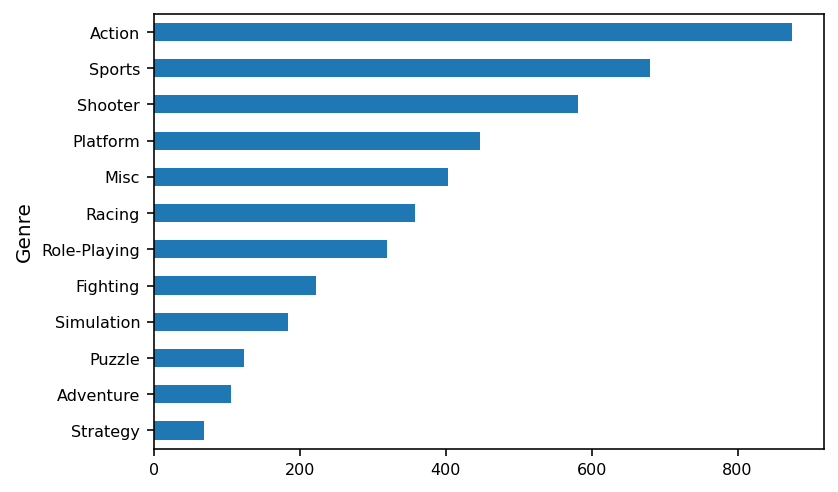

In [17]:
NA = locgame.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=True)
NA.plot(kind='barh', fontsize=8);

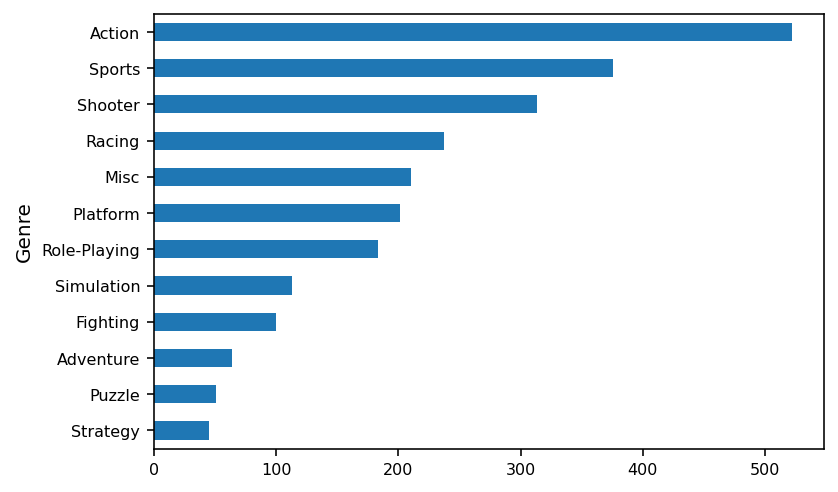

In [18]:
EU = locgame.groupby('Genre')['EU_Sales'].sum().sort_values(ascending=True)
EU.plot(kind='barh', fontsize=8);

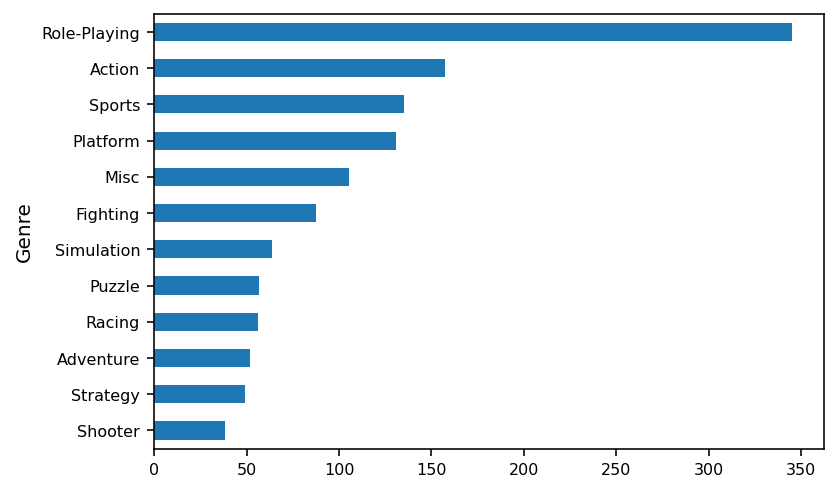

In [19]:
JP = locgame.groupby('Genre')['JP_Sales'].sum().sort_values(ascending=True)
JP.plot(kind='barh', fontsize=8);

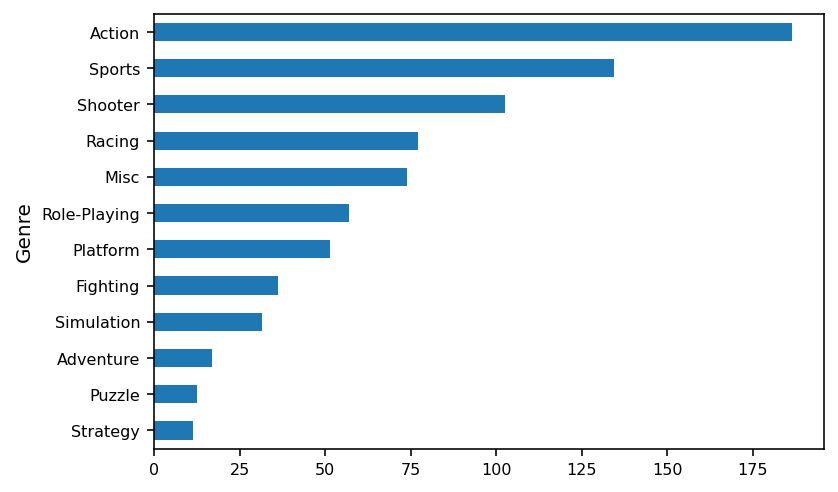

In [20]:
Other = locgame.groupby('Genre')['Other_Sales'].sum().sort_values(ascending=True)
Other.plot(kind='barh', fontsize=8);

In [21]:
games[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

NA_Sales       4363.80
EU_Sales       2416.33
JP_Sales       1277.21
Other_Sales     791.54
dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50669 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0

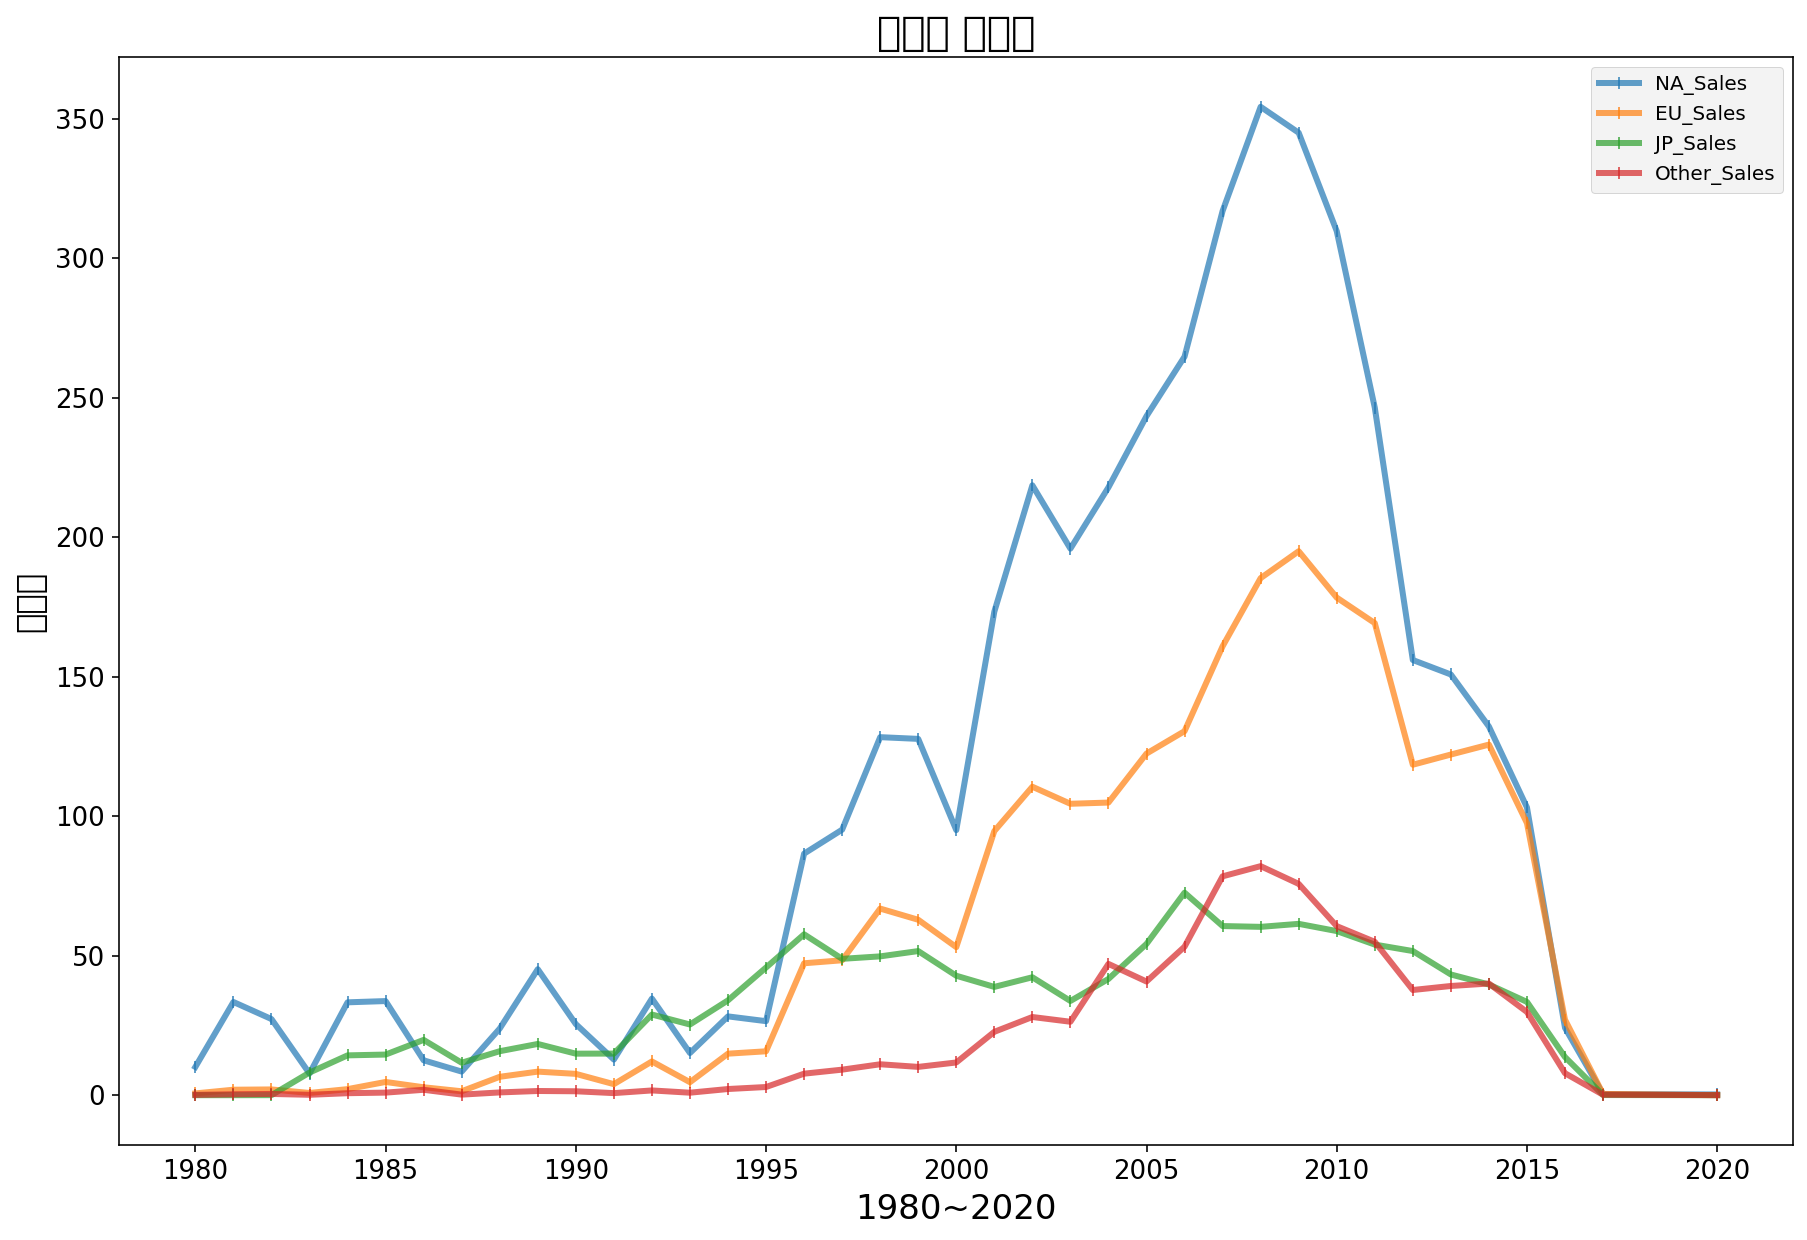

In [22]:
loc_value = games[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
loc_value.set_index('Year', inplace=True)
loc_value = loc_value.groupby(['Year'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()


loc_value.plot(
                kind='line',
                fontsize =13,
                figsize =(15,10),
                alpha =0.7,
                marker="|",
                linestyle ='-',
                linewidth =3,
                );

ax = plt.subplot()

plt.style.use('fivethirtyeight')

plt.xlabel('1980~2020', fontsize =17)
plt.ylabel('출고량', fontsize =17)
plt.title('지역별 출고량')
plt.legend(fontsize=10)

plt.show()

# 연도별 게임의 트렌드가 있을까?

In [23]:
sales = games[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
sales_sum = sales.sum(axis=1)

In [24]:
games['Sales_sum'] = sales_sum

In [25]:
genre_list = ['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
              'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
              'Shooter']

In [26]:
global_Genre = games[['Year', 'Name', 'Genre']]
global_Genre.set_index('Year', inplace=True)
global_Genre = global_Genre.groupby(['Year', 'Genre'])['Name'].count()
global_Genre = global_Genre.unstack()
global_Genre = global_Genre.fillna(0)
global_Genre.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980.0,1.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
1981.0,25.0,0.0,0.0,0.0,3.0,2.0,1.0,0.0,10.0,1.0,4.0,0.0
1982.0,18.0,0.0,0.0,2.0,5.0,3.0,3.0,0.0,5.0,0.0,2.0,0.0
1983.0,7.0,1.0,0.0,1.0,5.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1984.0,2.0,0.0,0.0,1.0,1.0,3.0,3.0,0.0,3.0,0.0,2.0,0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from curr

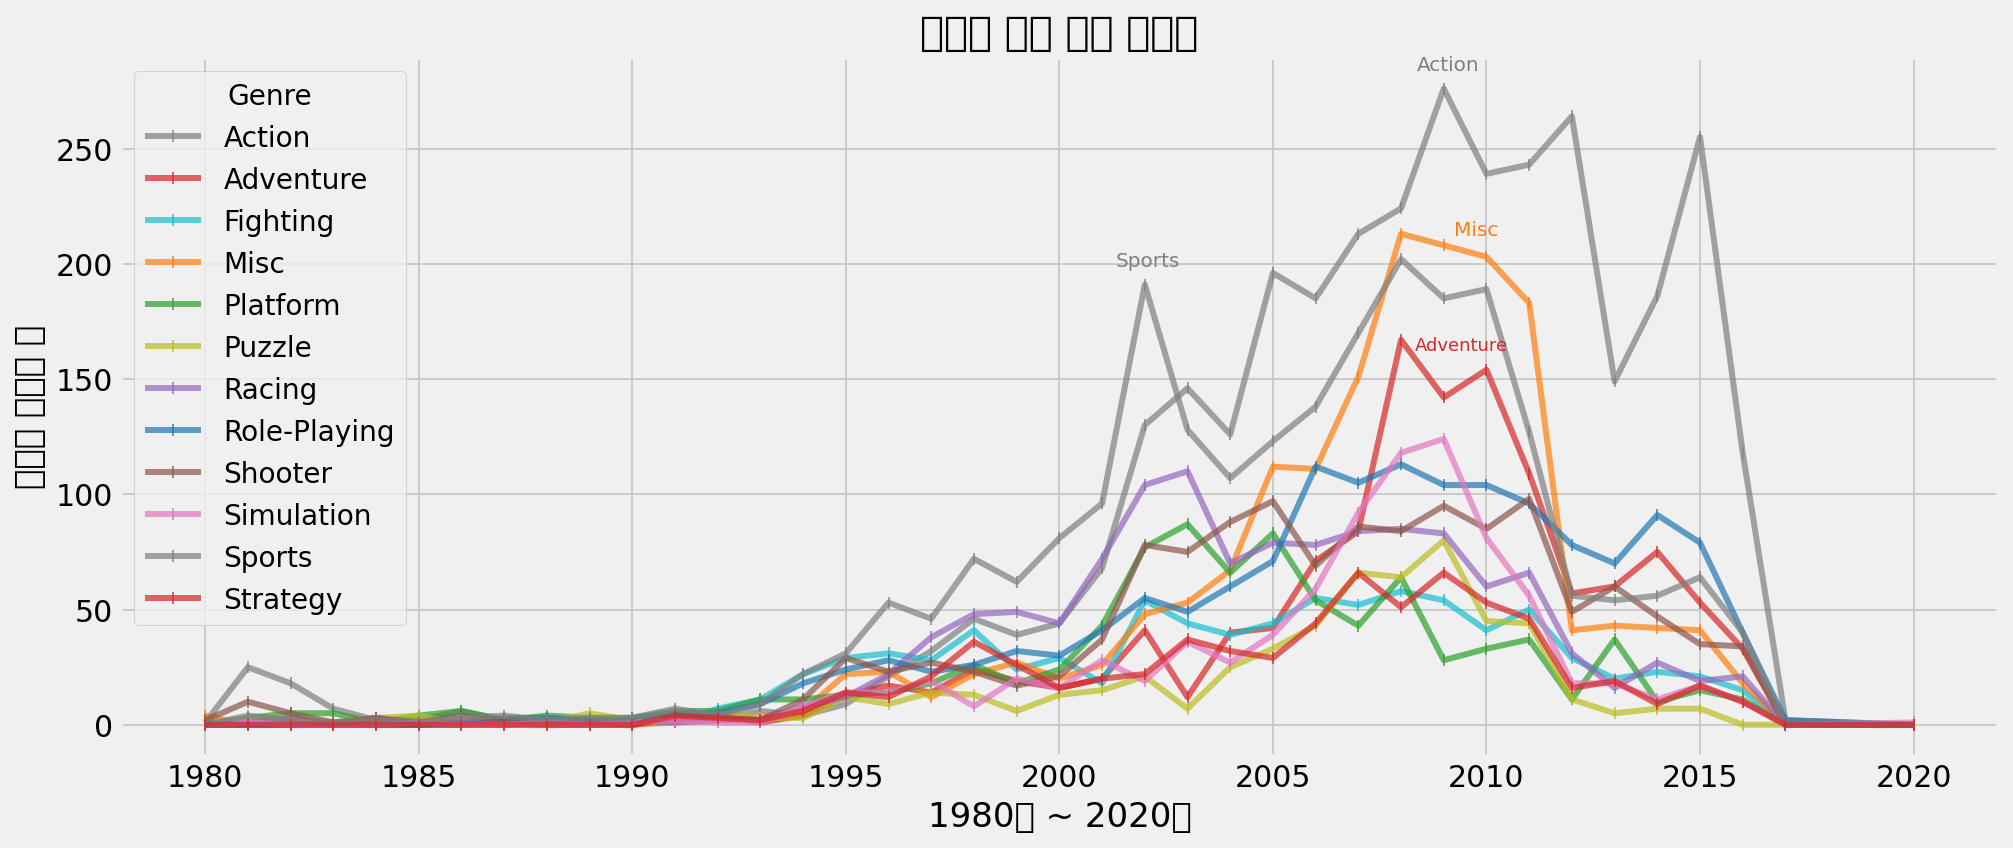

In [27]:
global_Genre.plot(
                kind='line',
                fontsize =15,
                figsize =(15,6),
                alpha =0.7,
                marker="|",
                linestyle ='-',
                linewidth =3,
                color = ['#7f7f7f', '#d62728', '#17becf', '#ff7f0e', '#2ca02c','#bcbd22', '#9467bd','#1f77b4', '#8c564b', '#e377c2']
                )
ax = plt.subplot()

plt.style.use('fivethirtyeight')



plt.title("연도별 게임 장르 트렌트", fontsize =20)
plt.xlabel('1980년 ~ 2020년', fontsize =17)
plt.ylabel('장르별 출고량 합', fontsize =17)

plt.text(0.78-0.09, 0.98, 'Action', transform=ax.transAxes, fontsize=10, alpha=2, color='#7f7f7f')
plt.text(0.6-0.07, 0.7, 'Sports', transform=ax.transAxes, fontsize=10, alpha=2, color='#7f7f7f')
plt.text(0.80-0.09, 0.745, 'Misc', transform=ax.transAxes, fontsize=10, alpha=2, color='#ff7f0e')
plt.text(0.779-0.09, 0.58, 'Adventure', transform=ax.transAxes, fontsize=9, alpha=2, color='#d62728')


plt.show()

In [28]:
platform = games.loc[(games['Year'] >= 2000) & (games['Year']  <= 2016)]
platform.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


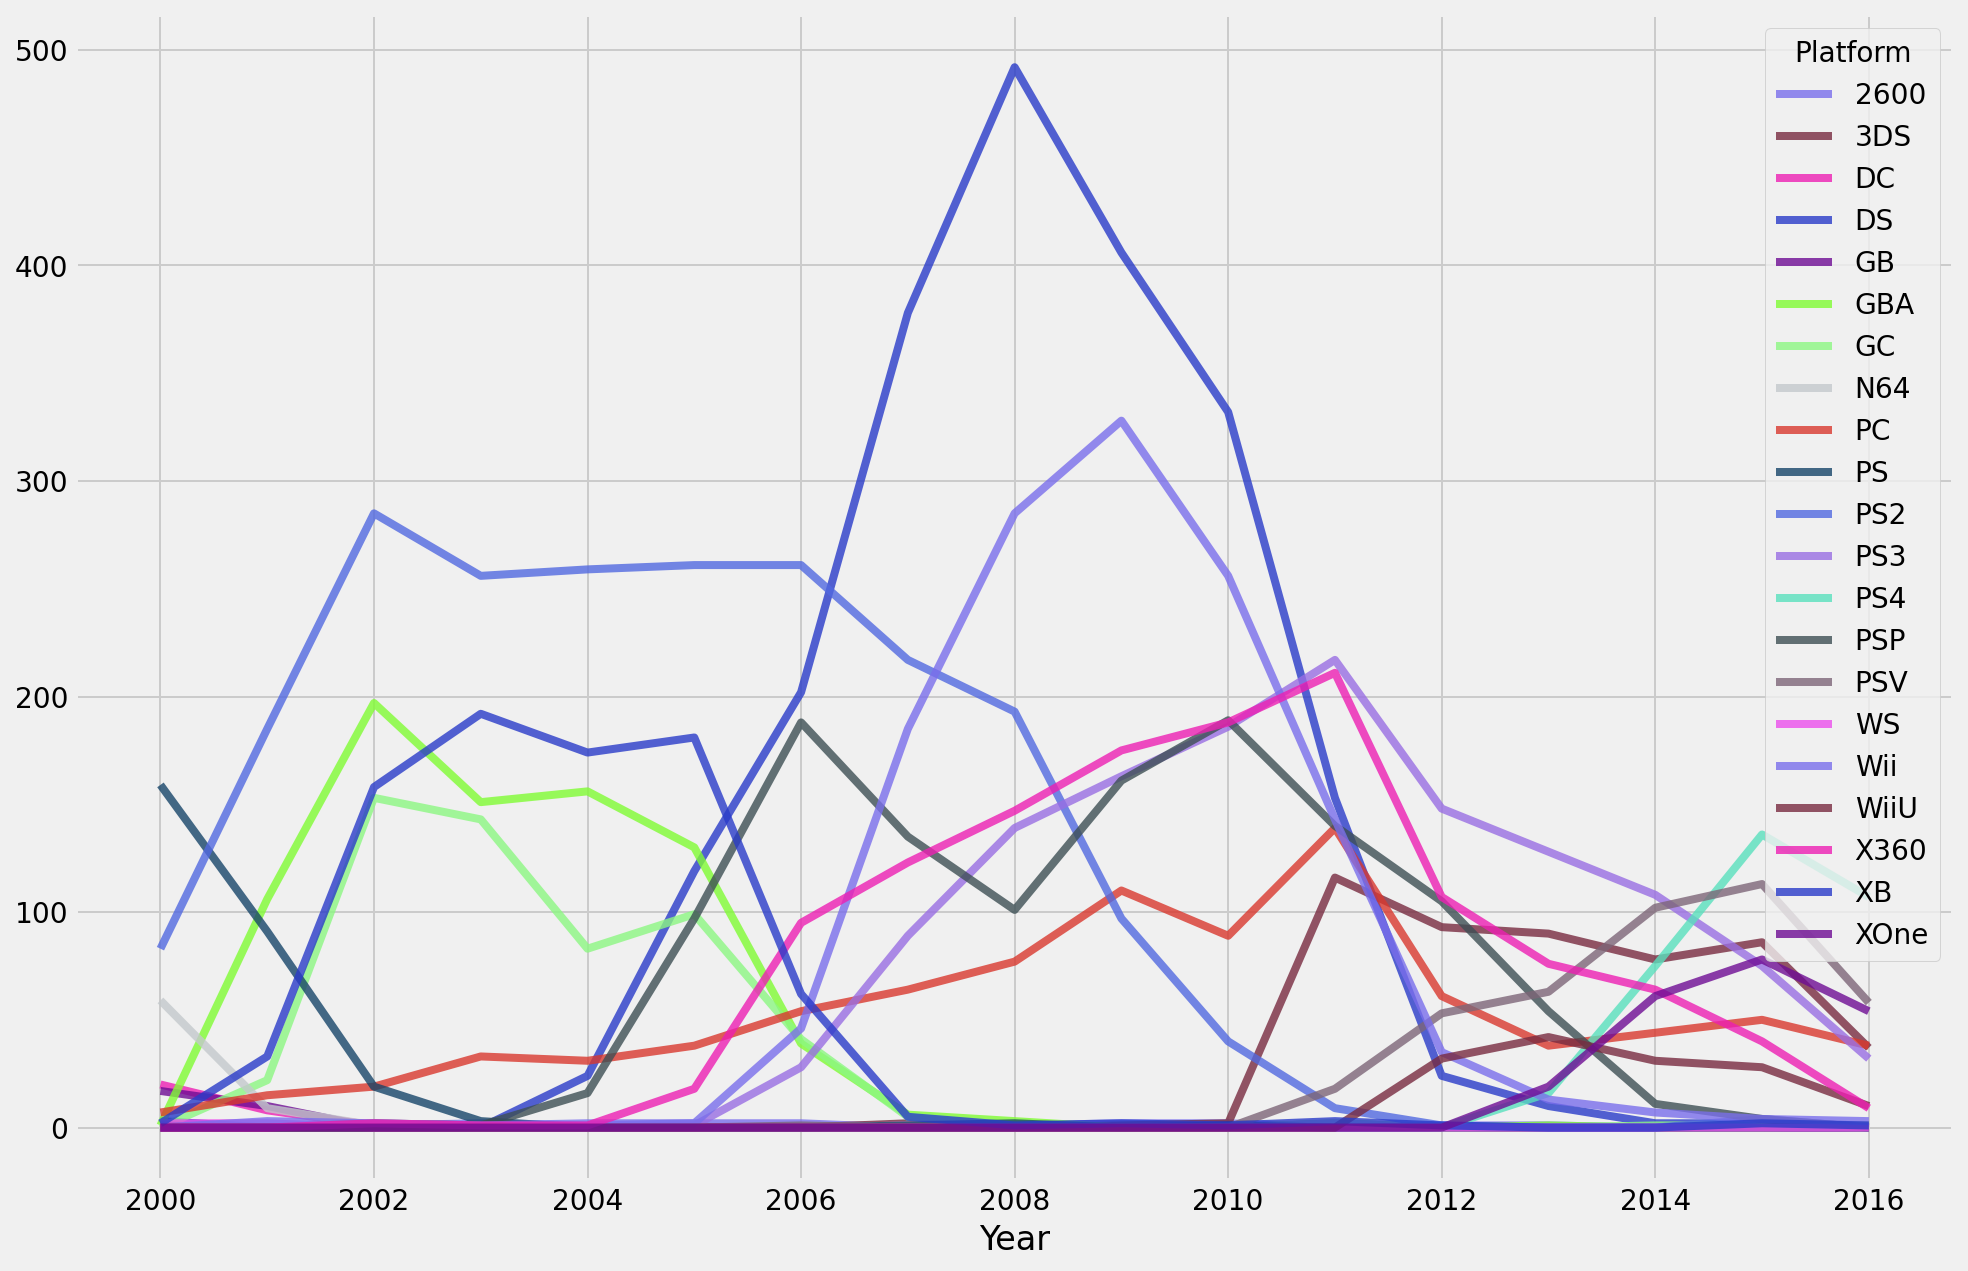

In [29]:
platform_sales = platform[['Year', 'Name', 'Platform']]
platform_sales.set_index('Year')
platform_sales = platform_sales.groupby(['Year','Platform'])['Name'].count()
platform_sales = platform_sales.unstack()
platform_sales = platform_sales.fillna(0)

plt.style.use('fivethirtyeight')

platform_sales.plot(kind='line',
                    figsize=(15, 10),
                    color = [(0.48, 0.43, 0.92, 0.95), (0.47, 0.17, 0.25, 0.58), (0.93, 0.12, 0.7, 0.6), (0.16, 0.23, 0.79, 0.34), (0.43, 0.05, 0.58, 0.05), (0.5, 0.99, 0.2, 0.75), (0.55, 0.97, 0.51, 0.05), (0.77, 0.79, 0.8, 0.7), (0.85, 0.22, 0.18, 0.13), (0.09, 0.27, 0.41, 0.77), (0.32, 0.41, 0.88, 0.74), (0.6, 0.43, 0.89, 0.02), (0.35, 0.88, 0.74, 0.14), (0.24, 0.31, 0.33, 0.82), (0.49, 0.4, 0.47, 0.82), (0.92, 0.31, 0.93, 0.58)],
                    alpha =0.8);

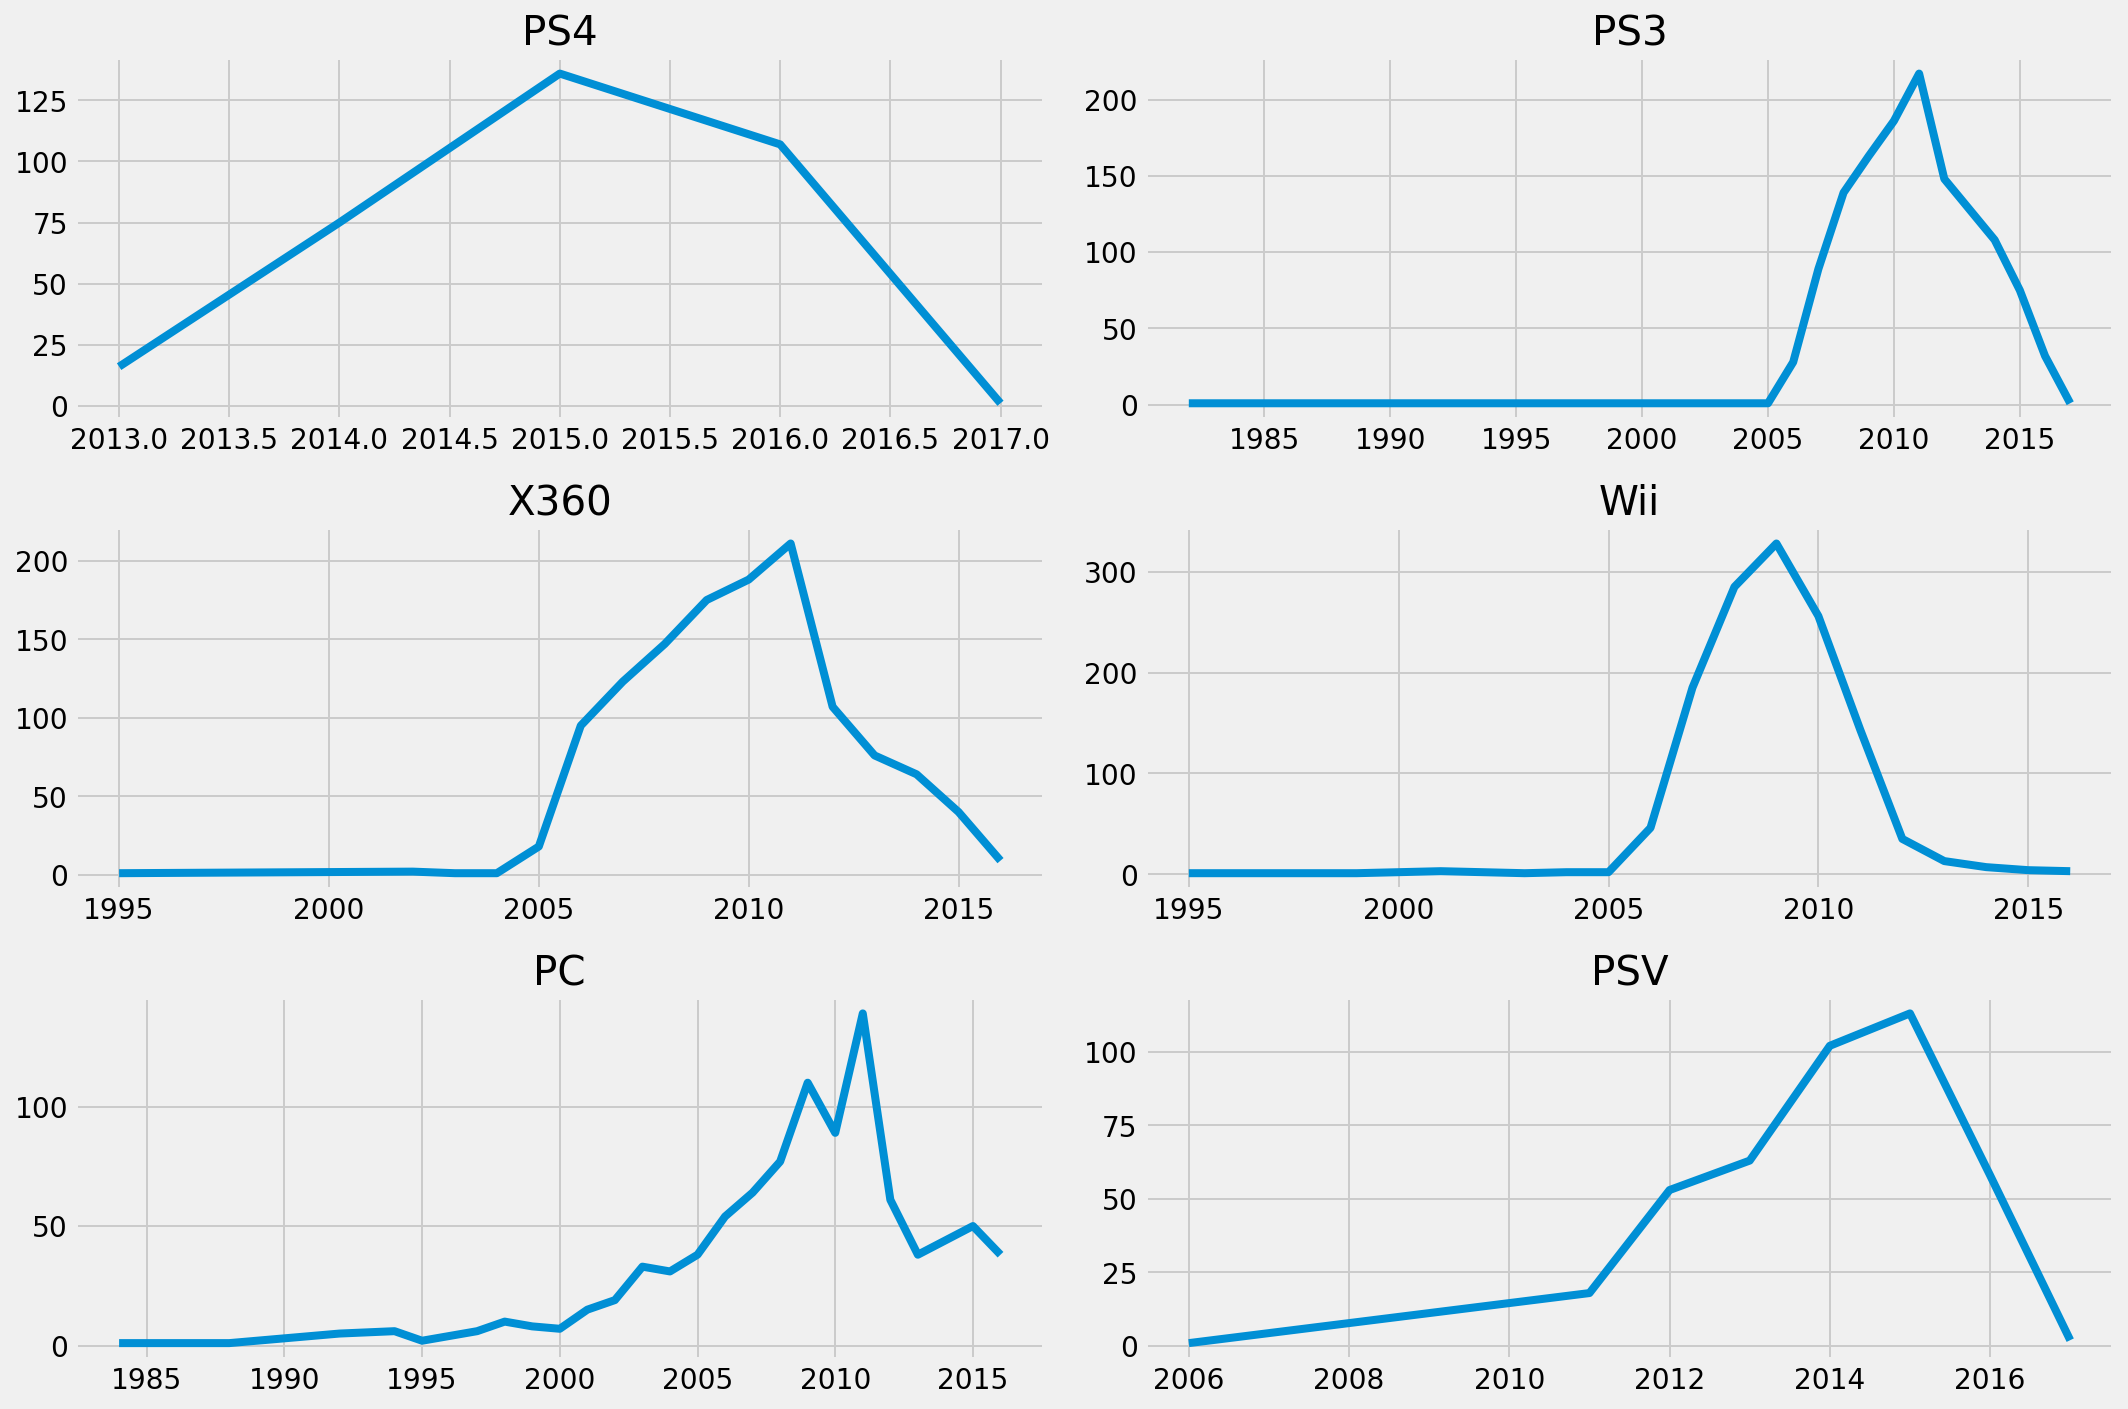

In [30]:
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

ax1.plot(games.loc[games['Platform'] == 'PS4'].groupby('Year')['Sales_sum'].count())
ax2.plot(games.loc[games['Platform'] == 'PS3'].groupby('Year')['Sales_sum'].count())
ax3.plot(games.loc[games['Platform'] == 'X360'].groupby('Year')['Sales_sum'].count())
ax4.plot(games.loc[games['Platform'] == 'Wii'].groupby('Year')['Sales_sum'].count())
ax5.plot(games.loc[games['Platform'] == 'PC'].groupby('Year')['Sales_sum'].count())
ax6.plot(games.loc[games['Platform'] == 'PSV'].groupby('Year')['Sales_sum'].count())

ax1.set_title("PS4")
ax2.set_title("PS3")
ax3.set_title("X360")
ax4.set_title("Wii")
ax5.set_title("PC")
ax6.set_title("PSV")



plt.tight_layout()
plt.show()


In [31]:
ps4 = games.loc[games['Platform'] == 'PS4']
ps3 = games.loc[games['Platform'] == 'PS3']
x360 = games.loc[games['Platform'] == 'X360']
wii = games.loc[games['Platform'] == 'Wii']
pc = games.loc[games['Platform'] == 'PC']
psv = games.loc[games['Platform'] == 'PSV']

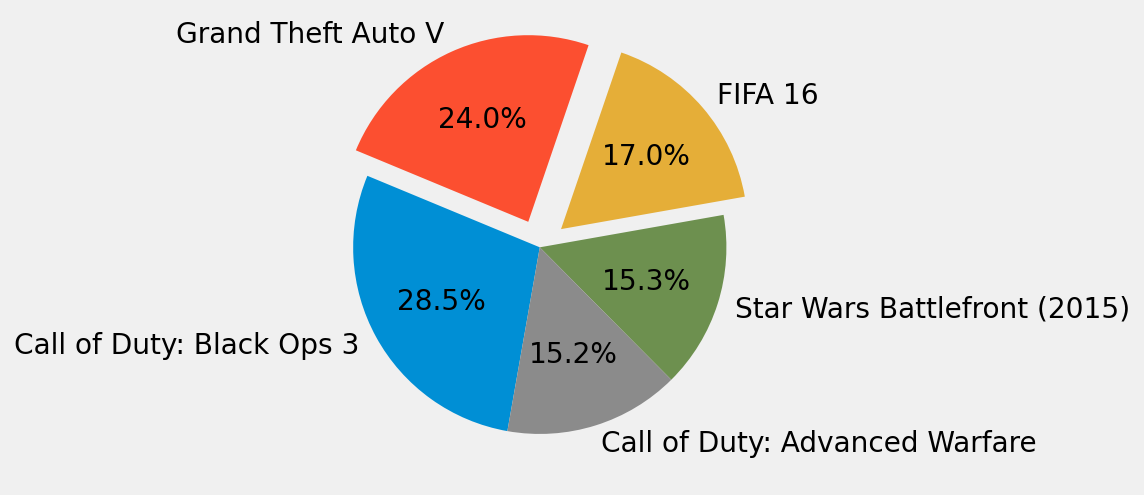

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
0,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
1,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
2,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
3,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
4,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,Activision,2.80,3.30,0.14,1.37,7.61


In [32]:
top5_ps4 = ps4.sort_values(by='Sales_sum', ascending=False)[:5]
top5_ps4.reset_index(drop=True, inplace=True)

ps4_sales = top5_ps4['Sales_sum']
ps4_names = top5_ps4['Name']

ps4_ratio = ps4_sales
ps4_labels = ps4_names
explode = [0, 0.15, 0.15, 0, 0]

plt.pie(ps4_ratio, labels=ps4_labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode)
plt.show()
top5_ps4
# 같은 장르는 붙였습니다.

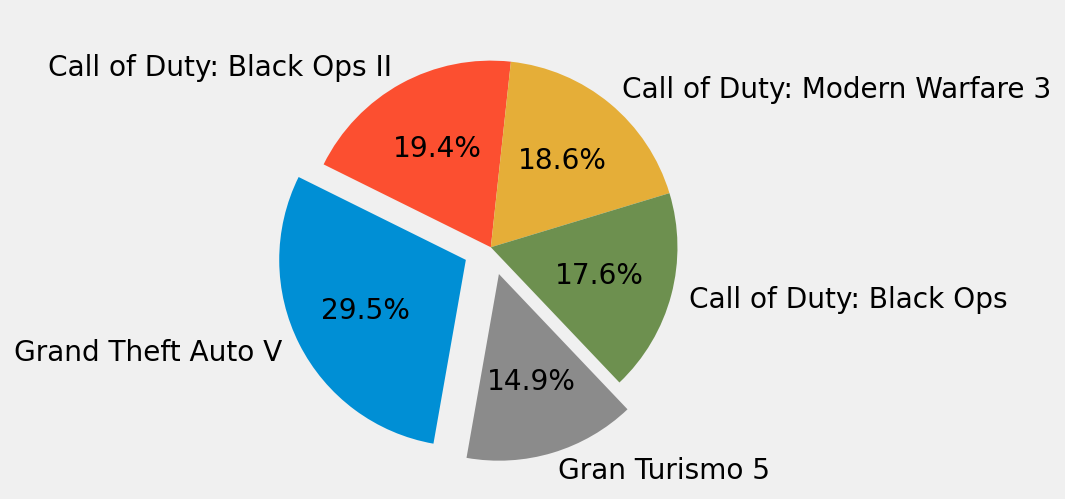

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
0,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
1,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.04
2,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.82,0.49,1.62,13.47
3,Call of Duty: Black Ops,PS3,2010.0,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
4,Gran Turismo 5,PS3,2010.0,Racing,Sony Computer Entertainment,2.96,4.88,0.81,2.12,10.77


In [33]:
top5_ps3 = ps3.sort_values(by='Sales_sum', ascending=False)[:5]
top5_ps3.reset_index(drop=True, inplace=True)

ps3_sales = top5_ps3['Sales_sum']
ps3_names = top5_ps3['Name']

ps3_ratio = ps3_sales
ps3_labels = ps3_names
explode = [0.15, 0, 0, 0, 0.15]

plt.pie(ps3_ratio, labels=ps3_labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode)
plt.show()
top5_ps3

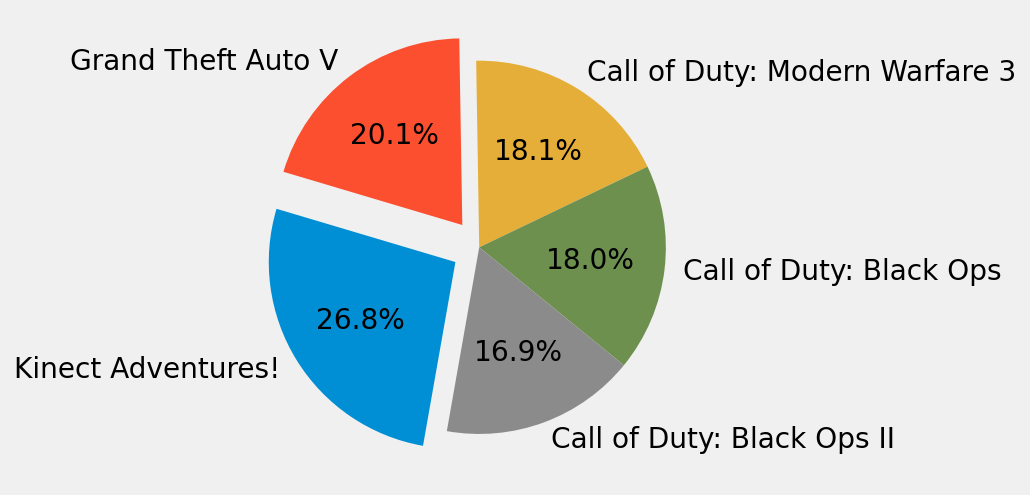

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
0,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
1,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
2,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
3,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
4,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.74


In [34]:
top5_x360 = x360.sort_values(by='Sales_sum', ascending=False)[:5]
top5_x360.reset_index(drop=True, inplace=True)

x360_sales = top5_x360['Sales_sum']
x360_names = top5_x360['Name']

x360_ratio = x360_sales
x360_labels = x360_names
explode = [0.15, 0.15, 0, 0, 0]

plt.pie(x360_ratio, labels=x360_labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode)
plt.show()
top5_x360

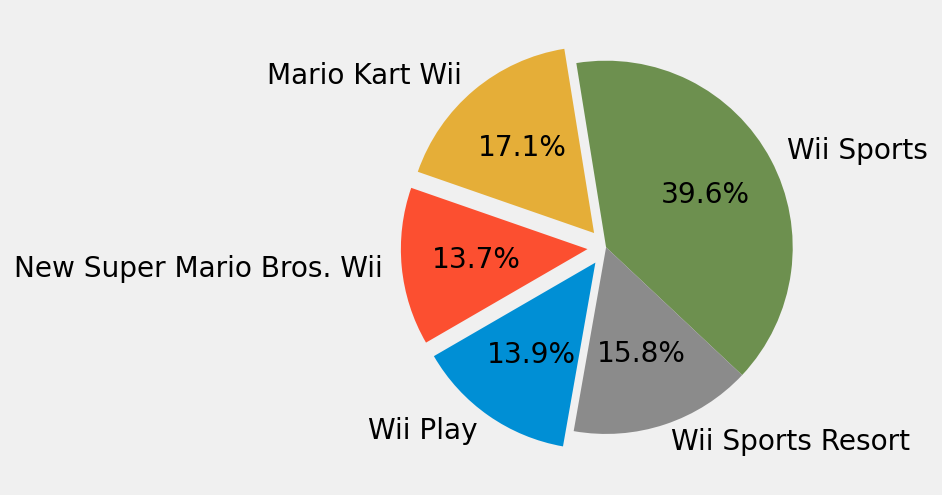

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
3,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
4,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00


In [35]:
top5_wii = wii.sort_values(by='Sales_sum', ascending=False)[:5]
top5_wii.reset_index(drop=True, inplace=True)
top5_wii.sort_values(by='Genre', ascending=True, inplace=True)

wii_sales = top5_wii['Sales_sum']
wii_names = top5_wii['Name']

wii_ratio = wii_sales
wii_labels = wii_names
explode = [0.1, 0.1, 0.1, 0, 0]

plt.pie(wii_ratio, labels=wii_labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode)
plt.show()
top5_wii

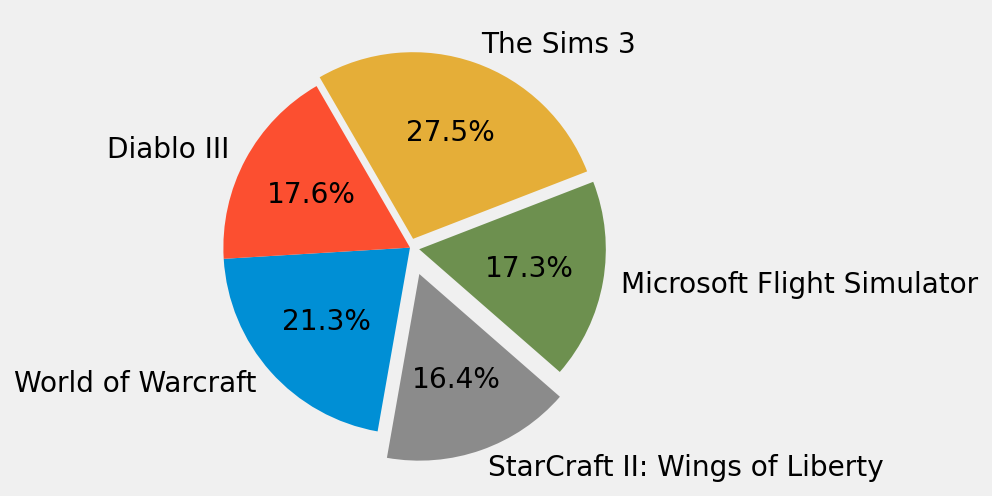

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
1,World of Warcraft,PC,2004.0,Role-Playing,Activision,0.07,6.21,0.0,0.00,6.28
2,Diablo III,PC,2012.0,Role-Playing,Activision,2.43,2.15,0.0,0.62,5.20
0,The Sims 3,PC,2009.0,Simulation,Electronic Arts,0.98,6.42,0.0,0.71,8.11
3,Microsoft Flight Simulator,PC,1996.0,Simulation,Microsoft Game Studios,3.22,1.69,0.0,0.20,5.11
4,StarCraft II: Wings of Liberty,PC,2010.0,Strategy,Activision,2.56,1.68,0.0,0.59,4.83


In [36]:
top5_pc = pc.sort_values(by='Sales_sum', ascending=False)[:5]
top5_pc.reset_index(drop=True, inplace=True)
top5_pc.sort_values(by='Genre', ascending=True, inplace=True)

pc_sales = top5_pc['Sales_sum']
pc_names = top5_pc['Name']

pc_ratio = pc_sales
pc_labels = pc_names
explode = [0, 0, 0.05, 0.05, 0.15]

plt.pie(pc_ratio, labels=pc_labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode)
plt.show()
top5_pc

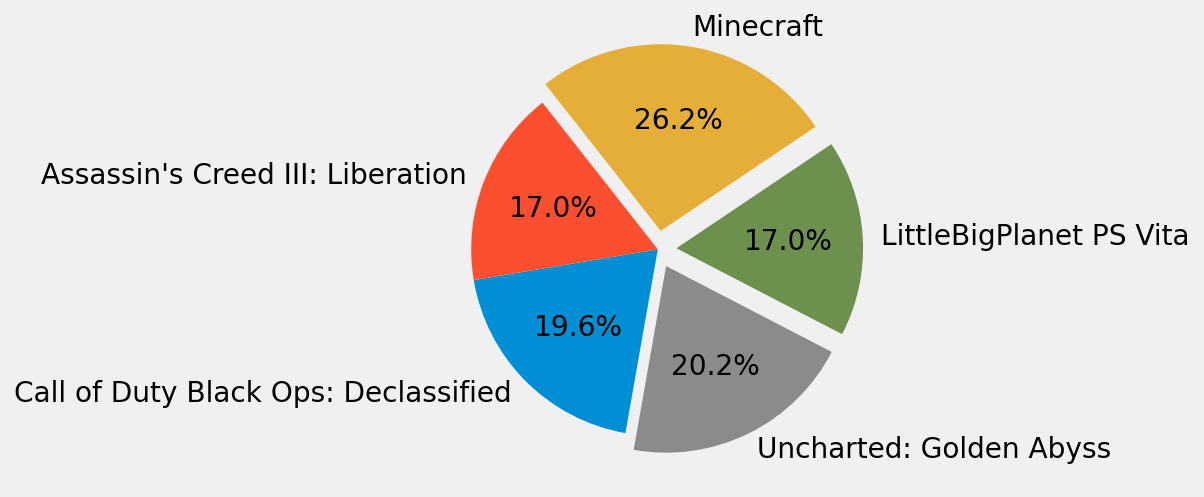

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
2,Call of Duty Black Ops: Declassified,PSV,2012.0,Action,Activision,0.80,0.52,0.07,0.30,1.69
4,Assassin's Creed III: Liberation,PSV,2012.0,Action,Ubisoft,0.58,0.55,0.06,0.28,1.47
0,Minecraft,PSV,2014.0,Misc,Sony Computer Entertainment Europe,0.28,0.79,0.87,0.32,2.26
3,LittleBigPlanet PS Vita,PSV,2012.0,Platform,Sony Computer Entertainment,0.40,0.72,0.02,0.33,1.47
1,Uncharted: Golden Abyss,PSV,2011.0,Shooter,Sony Computer Entertainment,0.59,0.75,0.13,0.27,1.74


In [40]:
top5_psv = psv.sort_values(by='Sales_sum', ascending=False)[:5]
top5_psv.reset_index(drop=True, inplace=True)
top5_psv.sort_values(by='Genre', ascending=True, inplace=True)


psv_sales = top5_psv['Sales_sum']
psv_names = top5_psv['Name']


psv_ratio = psv_sales
psv_labels = psv_names
explode = [0, 0, 0.10, 0.10, 0.10]

plt.pie(psv_ratio, labels=psv_labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode)
plt.show()
top5_psv